In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

C:\Users\khush\AppData\Local\Temp\ipykernel_41904\4292850693.py:18: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0.0, 1.0) #assigning i=sqrt(-1)
C:\Users\khush\AppData\Local\Temp\ipykernel_41904\4292850693.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0.0,1.0) #assigning i=sqrt(-1)


For 4 expanansion terms the error is 0.2537377837565189
For 8 expanansion terms the error is 0.10751732725194046
For 16 expanansion terms the error is 0.0071723776149805185
For 32 expanansion terms the error is 4.0323407890507923e-07
For 64 expanansion terms the error is 2.486596021728768e-16


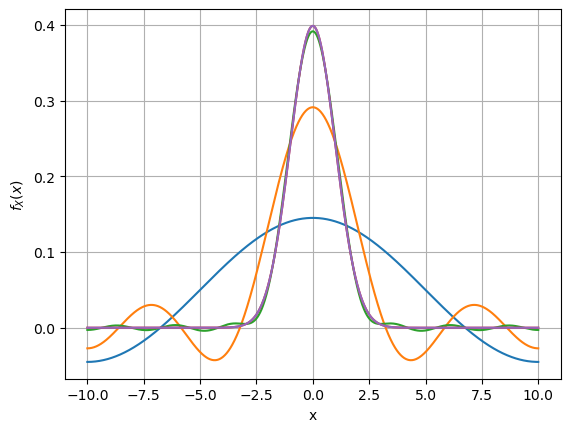

In [2]:
def COSDensity(cf,x,N,a,b):
    i = np.complex(0.0,1.0) #assigning i=sqrt(-1)
    k = np.linspace(0,N-1,N)
    u = np.zeros([1,N])
    u = k * np.pi / (b-a)
        
    #F_k coefficients
    F_k    = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a));
    F_k[0] = F_k[0] * 0.5; # adjustment for the first term
    
    #Final calculation
    f_X = np.matmul(F_k , np.cos(np.outer(u, x - a )))
        
    # we output only the first row
    return f_X
    
def mainCalculation():
    i = np.complex(0.0, 1.0) #assigning i=sqrt(-1)
    
    # setting for the COS method 
    a = -10.0
    b = 10.0
    
    #define the range for the expansion points
    N = [2**x for x in range(2,7,1)]
    
    # setting for normal distribution
    mu = 0.0
    sigma = 1.0 
        
    # Define characteristic function for the normal distribution
    cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma,2.0) * np.power(u,2.0));
    
    # define domain for density
    x = np.linspace(-10.0,10,1000)
    f_XExact = st.norm.pdf(x,mu,sigma)
    
    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    for n in N:
        f_X = COSDensity(cF,x,n,a,b)
        error = np.max(np.abs(f_X-f_XExact))
        print("For {0} expanansion terms the error is {1}".format(n,error))
        
        plt.plot(x,f_X)
    
    
mainCalculation()